In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, precision_recall_curve

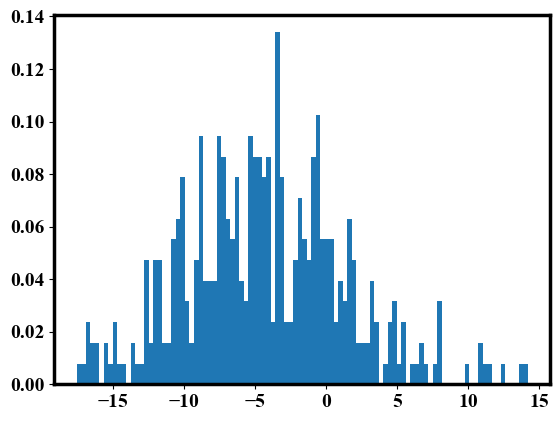

In [108]:
####### generating simulation data for Scenario 3 in the paper

####### section 1
p_i = [0.8, 0.2] # set probability of belonging to class 1 as 0.8.
n = 400   # set number of samples in the simulation

#set mean 0 and mean 1 for latent models
mu1 = [-5,1.25]  
mu2= [-1,0.25]  

# set standard deviation for latentmodels
sigma1 =[5,5]
sigma2 = [2,2]


alpha1=[]
alpha2=[]

yy=[]
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    yy.append(z_i)
    aa=np.random.normal(mu1[z_i], sigma1[z_i])
    bb=np.random.normal(mu2[z_i], sigma2[z_i])

    alpha1.append(aa)
    alpha2.append(bb)

one=np.where(np.array(yy)==0)
alpha1_1=np.array(alpha1)[one]
alpha2_1=np.array(alpha2)[one]

plt.hist(alpha1, bins=100,density=True)
plt.show()
########################################### set b values (strength of association to latent models for each score)
#b_alpha1=np.random.normal(3.5,1.5,6)
b_alpha1=0.6*np.array([0.12,0.1,0.10,0.09,0.11,0.10,0.17,0.1,0.16,0.1,0.13,0.10,0.09,0.11,0.10,0.1,0.1,0.1,0.1,0.1])
#b_alpha2=np.random.normal(7,1.5,5)
b_alpha2=np.array([0.17,0.18])
#b_alpha3=np.random.normal(0,1.5,2)
####################################### compute X values (scores)
epsilon=np.random.normal(0,0.3,400)
x1=[]
x1_std=[]
alp1=[]
for i in range (0,20):
    a=(b_alpha1[i]*np.array(alpha1))+np.random.normal(0,0.4,400)
    b=(a-np.mean(a))/(np.std(a))
    x1_std.append(np.std(a))
    x1.append(b)
    alp1.append(b[one])
x2=[]
x2_std=[]
alp2=[]
for i in range (0,2):
    a=(b_alpha2[i]*np.array(alpha2))+np.random.normal(0,0.4,400)
    b=(a-np.mean(a))/(np.std(a))
    x2_std.append(np.std(a))
    x2.append(b)
    alp2.append(b[one])



x1[0]=-x1[0]
x1[1]=-x1[1]
x1[2]=-x1[2]
x1[3]=-x1[3]
x1[4]=-x1[4]
x1[5]=-x1[5]
x1[6]=-x1[6]
x=np.concatenate([x1,x2])





true_acc1=(b_alpha1*6.25)/(((b_alpha1*5)**2)+0.16)
true_acc2=(b_alpha2*1.25)/(((b_alpha2*2)**2)+0.16)




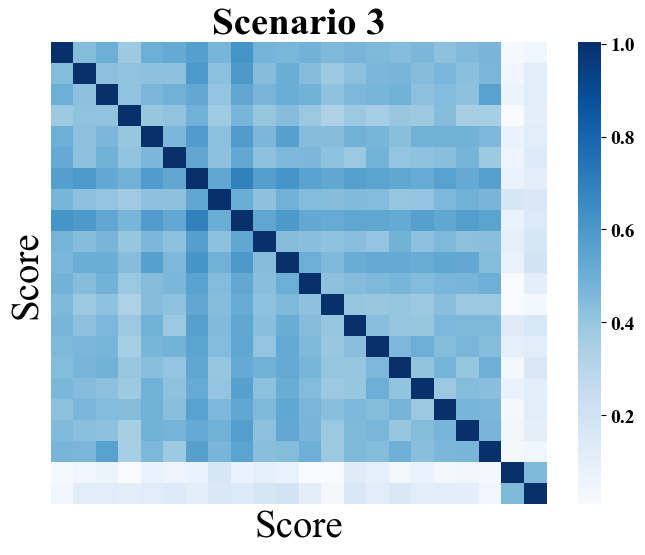

In [109]:
####### section 2
asa=np.cov(x) 
import seaborn as sb 
plt.figure(figsize=(8, 6))  
sb.heatmap(abs(asa),cmap="Blues") 
plt.xticks([]) 
plt.yticks([])
plt.xlabel("Score",fontsize=28)
plt.ylabel("Score",fontsize=28)
plt.title("Scenario 3", fontsize=28, fontweight='bold')
#print(clustering.labels_)
plt.savefig('2_latent_quartet_1_fig.tiff', format='tiff', dpi=600, bbox_inches='tight')

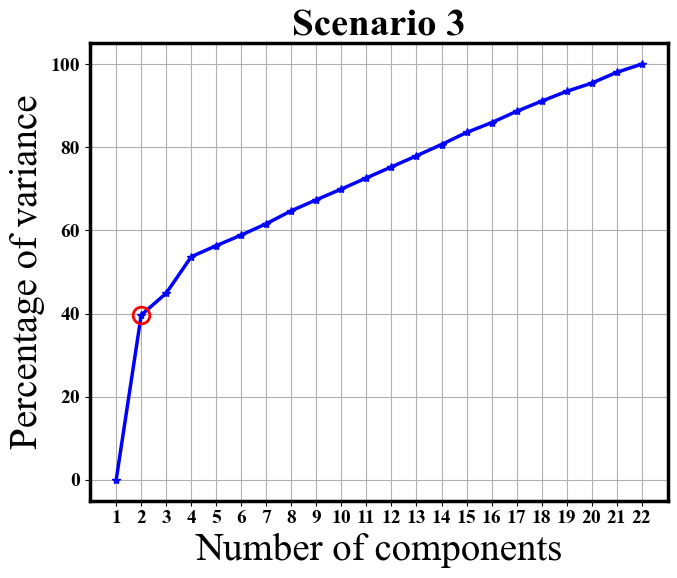

In [110]:
################ section 3
############### Elbow method
new_score=x
K = range(1, 23)
KM = [KMeans(n_clusters=k, random_state=42).fit(new_score) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(new_score, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / new_score.shape[0] for d in dist]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(new_score)**2) / new_score.shape[0]
bss = tss - wcss

kIdx = 1

# Elbow curve
fig, ax = plt.subplots(figsize=(7, 6))
font = {'family': 'Times New Roman', 'size': 14}

plt.rc('font', **font)
plt.rc('lines', linewidth=2.5)
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('hatch', color='k', linewidth=2.5)


ax.plot(K, np.array(bss) / tss * 100, 'b*-')
ax.plot(K[kIdx], (np.array(bss) / tss * 100)[kIdx], marker='o', markersize=12,
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of components', fontsize=28)
plt.ylabel('Percentage of variance', fontsize=28)
plt.xticks(np.arange(1, 23))
plt.title('Scenario 3', fontsize=28, fontweight='bold')
plt.tight_layout()
fig.savefig('2latent_varaince.tiff', format='tiff', dpi=600, bbox_inches='tight')


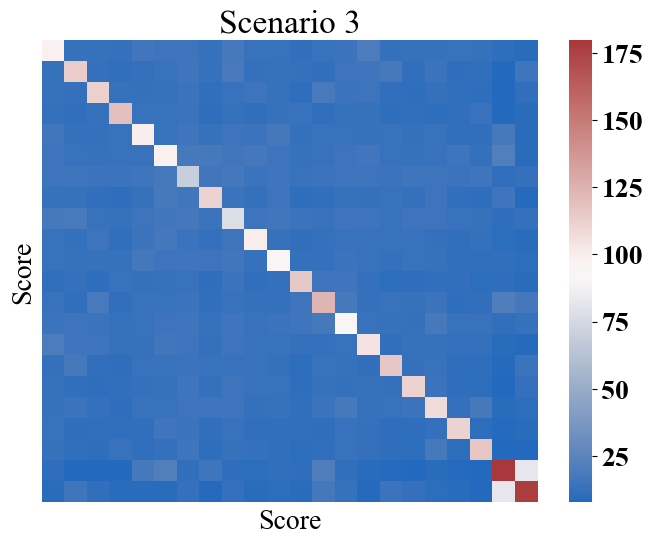

In [81]:
####### section 4
#quartet-based similarity matrix matrix
s=np.zeros([22,22])
for i in range (0,22):
    for j in range (0,22):
        for k in range(0,22):
           for l in range(0,22): 
            if k!=i and k!=j and l!=i and l!=j:
              b=np.abs((asa[i][j]*asa[k][l])-(asa[i][l]*asa[k][j]))
              s[i][j]=s[i][j]+b
plt.figure(figsize=(8, 6))               
sb.heatmap(s,cmap="vlag") 
plt.xticks([]) 
plt.yticks([])
plt.xlabel("Score")
plt.ylabel("Score")
plt.title("Scenario 3")
#print(clustering.labels_)
plt.savefig('2_latent_quartet_fig.tiff', format='tiff', dpi=600, bbox_inches='tight')

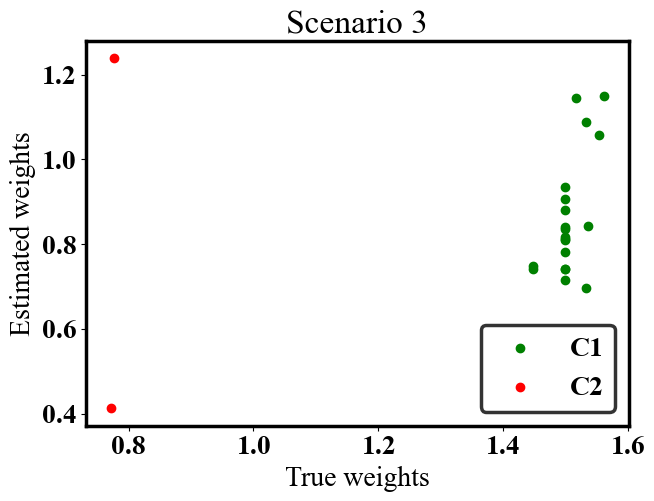

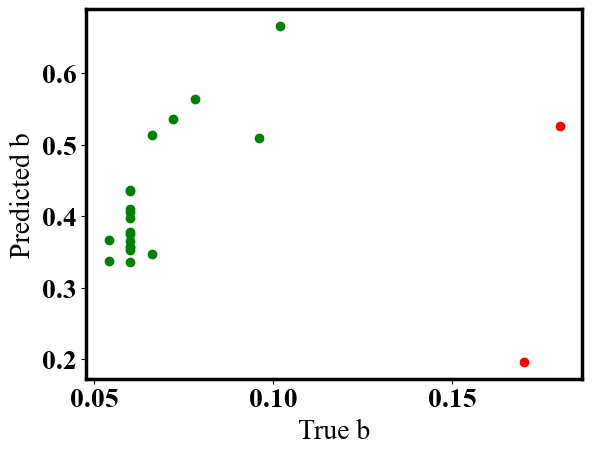

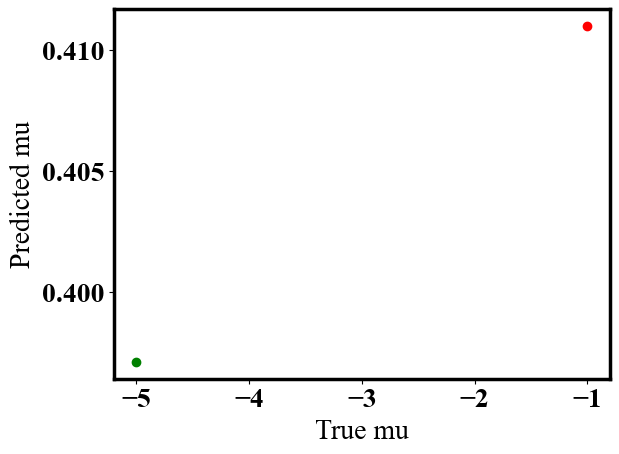

ROC-AUC: 0.8089709203839638
PRC-AUC: 0.5801059008024843


In [57]:
###### section 5

############### SUEL.CQO
asa=np.cov(x)
c=[[i for i in range(0,20)],[20,21]]
A=np.zeros([253,27]) #m(m-1)/2, m+2k+1
B=np.zeros([253,27])
z=np.zeros(253)
from itertools import combinations
########### diagonal blocks equations
hh=[i for i in range(0,27)]

n=0
for k in range (0,2): #35 equations
  a = list(combinations(c[k], 2))
  for i in range (0,len(a)):
      A[n][a[i][0]]=1
      A[n][a[i][1]]=1
      A[n][22+k]=1
      z[n]=np.log(np.abs(asa[a[i][0]][a[i][1]]))
      B[n][a[i][0]]=hh[a[i][0]]
      B[n][a[i][1]]=hh[a[i][1]]
      B[n][22+k]=hh[22+k]
      n=n+1
from itertools import product
for i in range(0,2):
    for j in range(i,2):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for k in range (0,len(a)):
            A[n][a[k][0]]=1
            A[n][a[k][1]]=1
            A[n][24+i]=1
            A[n][24+j]=1
            A[n][26]=1
            z[n]=np.log(np.abs(asa[a[k][0]][a[k][1]]))
            B[n][a[k][0]]=hh[a[k][0]]
            B[n][a[k][1]]=hh[a[k][1]]
            B[n][24+i]=hh[24+i]
            B[n][24+j]=hh[24+j]
            B[n][26]=hh[26]
            n=n+1


############################################constrained_linear_system of equation

from scipy.optimize import lsq_linear
cccc=lsq_linear(A,z,bounds=(- np.inf,0))
hh=cccc.x
std1=np.exp(cccc.x[-1])-(((np.exp(cccc.x[0:20]))**2)*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[24]))**2)
std2=np.exp(cccc.x[-1])-(((np.exp(cccc.x[20:22]))**2)*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[25]))**2)
acc1=-(np.exp(cccc.x[0:20])*np.exp(cccc.x[24]))/std1#np.sqrt(fff1)
acc2=-(np.exp(cccc.x[20:22])*np.exp(cccc.x[25]))/std2#np.sqrt(fff2)

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 30}
plt.scatter(true_acc1,abs(acc1), color='green')
plt.scatter(true_acc2, abs(acc2), color='red')

plt.ylabel('Estimated weights')
plt.xlabel('True weights')
plt.title("Scenario 3")

leg=plt.legend(["C1", "C2"], loc ="lower right")
leg.get_frame().set_linewidth(2.5)
leg.get_frame().set_edgecolor('k')
plt.show()
#######################################################
plt.scatter(abs(b_alpha1),np.exp(cccc.x[0:20])*np.array(x1_std), color='green')
plt.scatter(abs(b_alpha2),np.exp(cccc.x[20:22])*np.array(x2_std), color='red')

plt.xlabel('True b')
plt.ylabel('Predicted b')
plt.show()
#########################################################
plt.scatter(-5,np.exp(cccc.x[24]) , color='green')
plt.scatter(-1,np.exp(cccc.x[25]), color='red')

plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()
###########################################################
acc=abs(np.concatenate([acc1,acc2]))
#acc=abs(np.concatenate([true_acc1,true_acc2]))
ensi=[]
for i in range(0,len(acc)):
    if i in[0,1,2,3,4,5,6]:
        a=np.array(-x[i]).T*abs(acc[i])
        ensi.append(a)
    else:
        ensi.append(np.array(x[i]).T*abs(acc[i]))
suel_cqo=np.sum(ensi,axis=0) 

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))


     


ROC-AUC: 0.7280844155844156
PRC-AUC: 0.4930434674822419


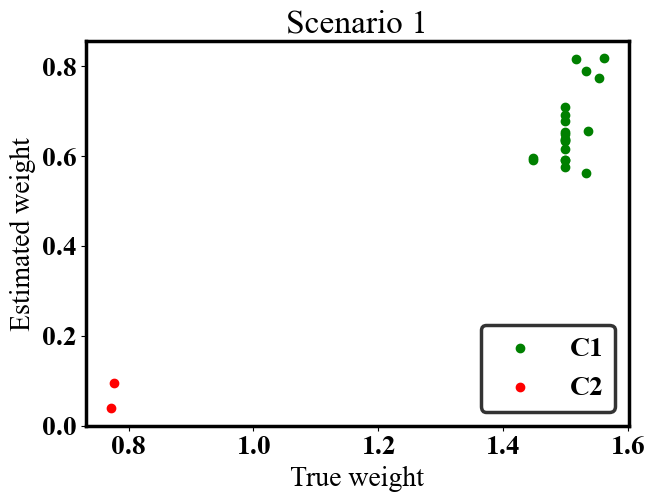

In [59]:
####################################################
#################################################### section 6
#################################################### Eigen
c=[[i] for i in range(0,22)]
asa=np.cov(x)
A=np.zeros([231,22]) #m(m-1)/2, m
B=np.zeros([231,22])
z=np.zeros(231)
n=0
hh=[i for i in range(0,22)]#res.x
for i in range(0,22):
    for j in range(i,22):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for h in range (0,len(a)):
            A[n][a[h][0]]=1
            A[n][a[h][1]]=1
            z[n]=np.log(np.abs(asa[a[h][0]][a[h][1]]))
            B[n][a[h][0]]=hh[a[h][0]]
            B[n][a[h][1]]=hh[a[h][1]]
            n=n+1  
            
sum_b=np.sum(B,axis=1)
          
from scipy.optimize import lsq_linear
res1=lsq_linear(A,z)            



ensi=[]
for i in np.concatenate(c):
        a=np.array(x[i]).T*np.exp(res1.x[i])
        ensi.append(a)

        
eigen_pc=np.sum(ensi,axis=0)

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 22}
plt.scatter(abs(true_acc1),np.exp(res1.x[0:20]) , color='green')
plt.scatter(abs(true_acc2), np.exp(res1.x[20:22]), color='red')

plt.ylabel('Estimated weight')
plt.xlabel('True weight')
plt.title("Scenario 1")
leg=plt.legend(["C1", "C2"], loc ="lower right")
leg.get_frame().set_linewidth(2.5)
leg.get_frame().set_edgecolor('k') 


fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),eigen_pc,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),eigen_pc,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2)) 




In [65]:

###### section 7
###### average of predictors
################################################################## Average of scores
average=np.mean(np.array(x),axis=0)
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),average,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),average,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))


ROC-AUC: 0.757128740824393
PRC-AUC: 0.5448531921807346


In [100]:

###### section 8
###### Best of predictors

all_score=np.concatenate([np.array(x1),np.array(x2)])
roc=[]
for i in range(0,len(all_score)):
    fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),all_score[i],pos_label=1)
    roc.append(auc(fpr1,tpr1))

best_score=all_score[np.argmax(np.array(roc))]
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),best_score,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),best_score,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.7656673441734417
PRC-AUC: 0.3747183885838133


/var/folders/63/r5m31vp516x6qwddwfqtw5xh0000gr/T/ipykernel_56364/1099561220.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))


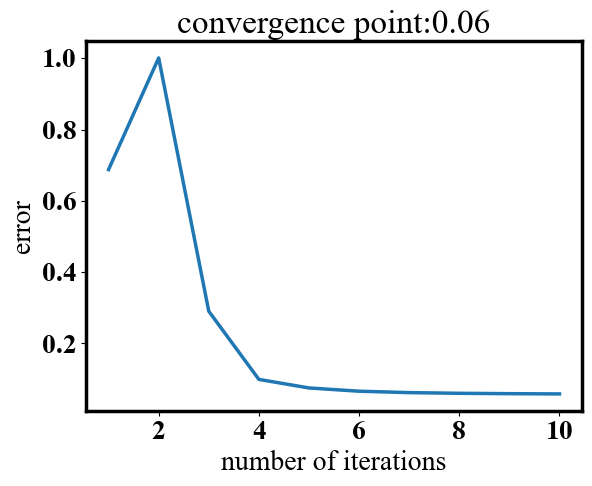

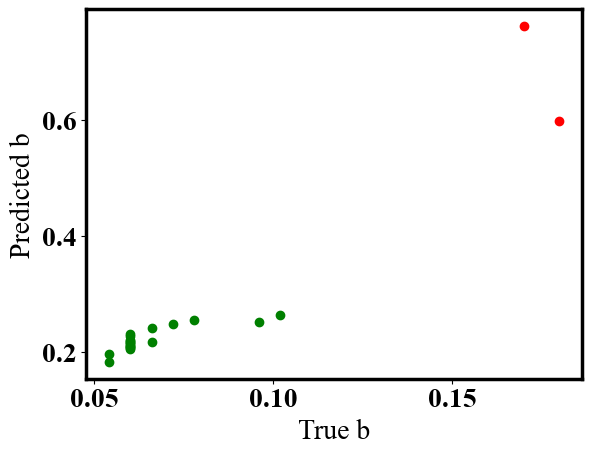

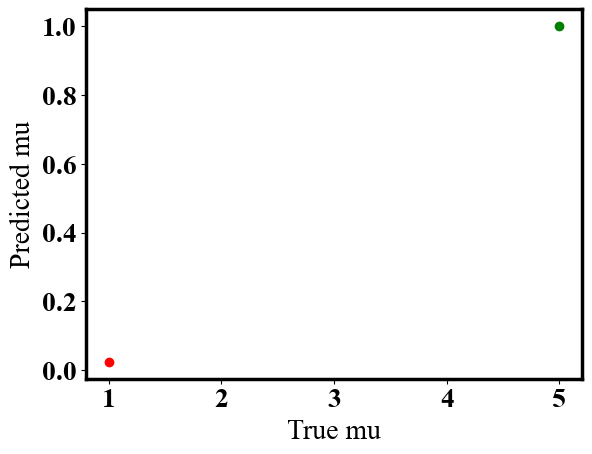

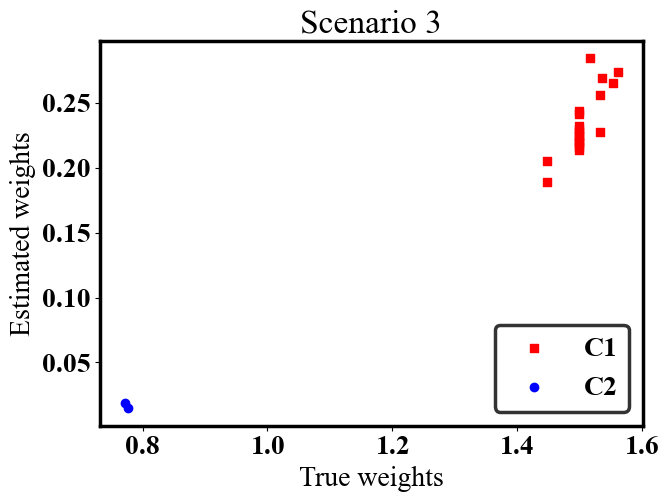

ROC_AUC: 0.8005011293054771
PRC_AUC: 0.5681282218645721


In [62]:

############### section 9
########################################################## SUEL.MF
cc=[[i for i in range(0,20)],[20,21]]
R=np.cov(x)
from scipy import linalg
d,w=linalg.eig(R)
index=np.argsort(-d)
W=w[:,index[0:2]]
################# computing B
B=np.zeros((22,2))
bb=np.random.rand(22,2)
U=np.zeros((2,2))
uu=np.random.rand(2,2)
U=U+uu
B=B+bb
RR=[]
ep1=[] 
diag_A=np.zeros((len(R),len(R))) 
for ii in range(0,10):
    d,w=linalg.eig(R-diag_A)
    index=np.argsort(-d)
    W=w[:,index[0:2]]
    RR=[]
    for i in range(0,2):
        c=-np.matmul(np.matrix(B[:,i]).T,np.matrix(U[:,i]))
        for f in range (0,2):
           c=np.matmul(np.matrix(B[:,f]).T,np.matrix(U[:,f]))+c
        RR.append(W-c)
    for i in range(0,2):   
       for j in range (0,22):
            if j in cc[i]: 
               B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))
            else:
               B[j][i]=0            
################## computing U
    S=np.matmul(B.T,W) 
    uu,ss,vvh=np.linalg.svd(S)
    U=np.matmul(uu,vvh) 
    asar=np.matmul(U,np.matmul(np.diag(d[index[0:2]]),U.T))
    diag_A=np.diag(np.diag(R-np.matmul(B,np.matmul(asar,B.T))))
    epsilon=abs(np.sum((W-np.matmul(B,U))*(W-np.matmul(B,U))))
    ep1.append(epsilon)    
plt.plot(np.arange(1,11),ep1[0:10])
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("convergence point:{}".format(np.round(ep1[-1],2)))
plt.show()
##################
###########################################
B=abs(B)
plt.scatter(b_alpha1,(B[0:20,0]), color='green')
plt.scatter(b_alpha2,(B[20:22,1]), color='red')

plt.xlabel('True b')
plt.ylabel('Predicted b')
plt.show()
################################ computing mu0
asa=np.matmul(U,np.matmul(np.diag(d[index[0:2]]),U.T))
################################ computing eigen decomposition
dd,ww=linalg.eig(asa)      
mu=abs(np.real(ww[:,0]))    
##############################################
plt.scatter(5, abs(mu[0]), color='green')
plt.scatter(1, abs(mu[1]), color='red')
plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()
######################################### computing accuracy
B=abs(B)
acc1=-(B[0:20,0]*mu[0])/(1-((B[0:20,0]*mu[0])**2))
acc2=-(B[20:22,1]*mu[1])/(1-((B[20:22,1]*mu[1])**2))

#############################################
fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 26}

plt.scatter((true_acc1),abs(acc1), color='red',marker="s")
plt.scatter((true_acc2),abs(acc2), color='blue')



plt.xlabel('True weights')
plt.ylabel('Estimated weights')
plt.title("Scenario 3")

leg=plt.legend(["C1", "C2"], loc ="lower right")
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.5)
plt.savefig('Scenario2.tiff',format='tiff', dpi=600)
plt.show()
###################################################### Evaluation
acc=abs(np.concatenate([acc1,acc2]))
ensi=[]
for i in range(0,len(acc)):
    if i in[0,1,2,3,4,5,6]:
        a=np.array(-x[i]).T*abs(acc[i])
        ensi.append(a)
    else:
        ensi.append(np.array(x[i]).T*abs(acc[i]))
suel_mf=np.sum(ensi,axis=0)

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("ROC_AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("PRC_AUC:",auc(tpr2,fpr2)) 

In [63]:
#section 10
######### Ground truth
acc=abs(np.concatenate([true_acc1,true_acc2]))
ensi=[]
for i in range(0,len(acc)):
    if i in[0,1,2,3,4,5,6]:
        a=np.array(-x[i]).T*abs(acc[i])
        ensi.append(a)
    else:
        ensi.append(np.array(x[i]).T*abs(acc[i]))
ground_truth=np.sum(ensi,axis=0)

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("ROC_AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("PRC_AUC:",auc(tpr2,fpr2)) 

ROC_AUC: 0.8005011293054771
PRC_AUC: 0.5681282218645721


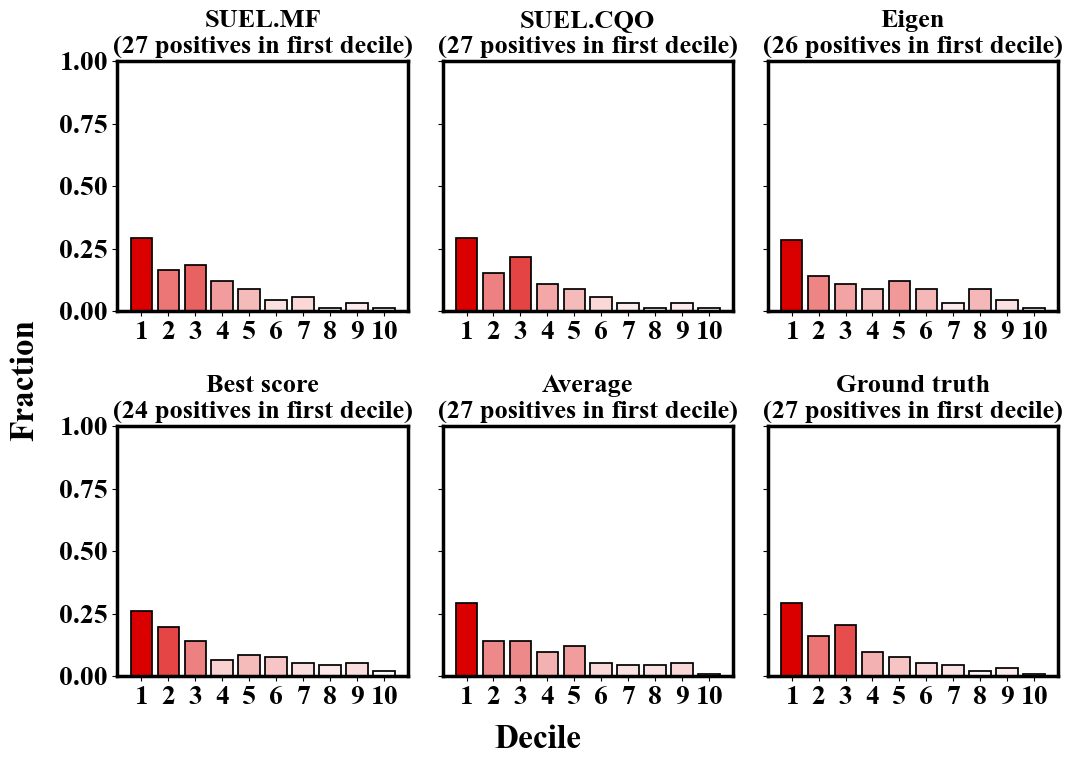

In [64]:
# section 11
# The distribution of positive samples across different decile of prediction models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
yy=np.array(yy)

ensemble_scores = [
    np.array(suel_mf),
    np.array(suel_cqo),
    np.array(eigen_pc),
    np.array(best_score),
    np.array(average),
    (np.array(ground_truth))
]

# Create subplots for each ensemble score
fig, axs = plt.subplots(2, 3, figsize=(11, 8), sharey=True)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
plt.rc('font', **font)

# List of labels for subplots
labels = ['SUEL.MF', 'SUEL.CQO', 'Eigen', 'Best score', 'Average',"Ground truth"]

# Iterate over each ensemble score and plot
for i, scores in enumerate(ensemble_scores):
    # Sort the scores and labels together
    inds = (-scores).argsort()
    sorted_gene = yy[inds]

    def divide(lst, n):
        p = len(lst) // n
        if len(lst)-p > 0:
            return [lst[:p]] + divide(lst[p:], n-1)
        else:
            return [lst]
    
    lst = sorted_gene
    b = divide(lst, 10)
    numbers = [sum(sublist) for sublist in b]
    overlap = np.sum(np.array(numbers))
    data = np.array(numbers) / np.sum(np.array(numbers))

    # Plotting each ensemble score in the corresponding subplot
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    ax = axs[row, col]  # Select the correct subplot

    # Colorize the graph based on likeability:
    likeability_scores = -np.array(data)
    data_normalizer = mp.colors.Normalize()
    color_map = mp.colors.LinearSegmentedColormap(
        "my_map",
        {'blue':   ((0.0, 0.0, 0.0), 
                     (1.0, 1,   1)),  # red ), # blue
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1, 1)),
         'red':  ((0.0, 0.86, 0.86),
                  (1.0, 1, 1))  # blue
        }
    )

    # Map xs to numbers:
    N = len(data)
    x_nums = np.arange(1, N+1)

    # Plot a bar graph:
    ax.bar(
        x_nums,
        data,
        align="center",
        color=color_map(data_normalizer(likeability_scores)),
        linewidth=1.25,
        ec="k"
    )
   
    ax.set_title(f'{labels[i]}\n({numbers[0]} positives in first decile)', loc='center', fontsize=19, fontweight='bold')
    ax.set_ylim((0, 1))
    ax.set_xticks(x_nums)

# Remove any extra subplots if there are fewer than 6 ensembles
if len(ensemble_scores) < 6:
    for i in range(len(ensemble_scores), 6):
        fig.delaxes(axs.flatten()[i])

# Set common labels for the whole figure
# Set common labels for the whole figure
fig.text(0.5, 0.04, 'Decile', ha='center', fontsize=24, fontweight='bold')
fig.text(0.02, 0.5, 'Fraction', va='center', rotation='vertical', fontsize=24, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()
fig.savefig('2_latent_ASD_dist_fig.tiff', format='tiff', dpi=600, bbox_inches='tight')